In [2]:
import pandas as pd
import numpy as np
import datetime
import time

import torch
from torch import nn

import matplotlib.pyplot as plt

In [3]:
# Read bloomberg data
usd_idr = pd.read_csv('usd_idr_data.csv')

usd_idr

,date,open,high,low,close
0,1991-11-05,1977.0,1977.0,1977.0,1977.0
1,1991-11-06,1977.0,1977.0,1977.0,1977.0
2,1991-11-07,1977.0,1977.0,1977.0,1977.0
3,1991-11-08,1977.0,1977.0,1977.0,1977.0
4,1991-11-11,1977.0,1977.0,1977.0,1977.0
...,...,...,...,...,...
8384,2024-10-29,15737.0,15778.0,15737.0,15760.0
8385,2024-10-30,15747.0,15747.0,15700.0,15700.0
8386,2024-10-31,15700.0,15715.0,15695.0,15697.0
8387,2024-11-01,15718.0,15730.0,15713.0,15720.0


In [4]:
# Read bloomberg data
usdt_idrt = pd.read_csv('usdt_idrt_raw.csv')

usdt_idrt

,opentime,openprice,highprice,lowprice,closeprice,closetime
0,2020-04-17,15603.0,15603.0,3500.0,3800.0,2020-04-17
1,2020-04-17,3900.0,9999.0,3121.0,9999.0,2020-04-17
2,2020-04-17,9999.0,15400.0,3121.0,15300.0,2020-04-17
3,2020-04-17,15300.0,15399.0,3905.0,13662.0,2020-04-17
4,2020-04-17,13662.0,15000.0,3905.0,15000.0,2020-04-17
...,...,...,...,...,...,...
2375391,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375392,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375393,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375394,2024-10-23,15693.0,15693.0,15693.0,15693.0,2024-10-23


In [5]:
usdt_idrt_daily = usdt_idrt.groupby('opentime').agg(
    openprice=('openprice', 'first'),  # Keep the first open price
    closeprice=('closeprice', 'last'),  # Keep the last close price
    highprice=('highprice', 'max'),     # Get the maximum high price
    lowprice=('lowprice', 'min')        # Get the minimum low price
).reset_index()

usdt_idrt_daily

,opentime,openprice,closeprice,highprice,lowprice
0,2020-04-17,15603.0,15503.0,16000.0,3121.0
1,2020-04-18,15503.0,15367.0,15690.0,15367.0
2,2020-04-19,15367.0,15415.0,15698.0,15367.0
3,2020-04-20,15421.0,15485.0,15899.0,15410.0
4,2020-04-21,15485.0,15911.0,15993.0,15440.0
...,...,...,...,...,...
1646,2024-10-19,15528.0,15501.0,15528.0,15500.0
1647,2024-10-20,15501.0,15481.0,15525.0,15480.0
1648,2024-10-21,15481.0,15573.0,15580.0,15425.0
1649,2024-10-22,15573.0,15602.0,15630.0,15556.0


In [6]:
import pandas as pd

# Sample DataFrames (assuming usdt_idrt_daily and usd_idr are already defined)

# Merge the two DataFrames on 'opentime' and 'date'
joined_table = pd.merge(
    usdt_idrt_daily,
    usd_idr,
    left_on='opentime',  # Column from usdt_idrt_daily
    right_on='date',     # Column from usd_idr
    how='inner'          # Keep only rows with matching dates
)

# Display the joined DataFrame
joined_table

,opentime,openprice,closeprice,highprice,lowprice,date,open,high,low,close
0,2020-04-17,15603.0,15503.0,16000.0,3121.0,2020-04-17,15505.0,15540.0,15438.0,15465.0
1,2020-04-20,15421.0,15485.0,15899.0,15410.0,2020-04-20,15470.0,15507.0,15413.0,15413.0
2,2020-04-21,15485.0,15911.0,15993.0,15440.0,2020-04-21,15507.0,15583.0,15468.0,15468.0
3,2020-04-22,15911.0,15749.0,15921.0,15460.0,2020-04-22,15530.0,15585.0,15450.0,15450.0
4,2020-04-23,15749.0,15720.0,15749.0,15422.0,2020-04-23,15524.0,15598.0,15415.0,15415.0
...,...,...,...,...,...,...,...,...,...,...
1088,2024-10-17,15542.0,15569.0,15570.0,15518.0,2024-10-17,15548.0,15553.0,15490.0,15495.0
1089,2024-10-18,15569.0,15528.0,15570.0,15465.0,2024-10-18,15523.0,15523.0,15447.0,15465.0
1090,2024-10-21,15481.0,15573.0,15580.0,15425.0,2024-10-21,15463.0,15498.0,15431.0,15495.0
1091,2024-10-22,15573.0,15602.0,15630.0,15556.0,2024-10-22,15534.0,15572.0,15534.0,15560.0


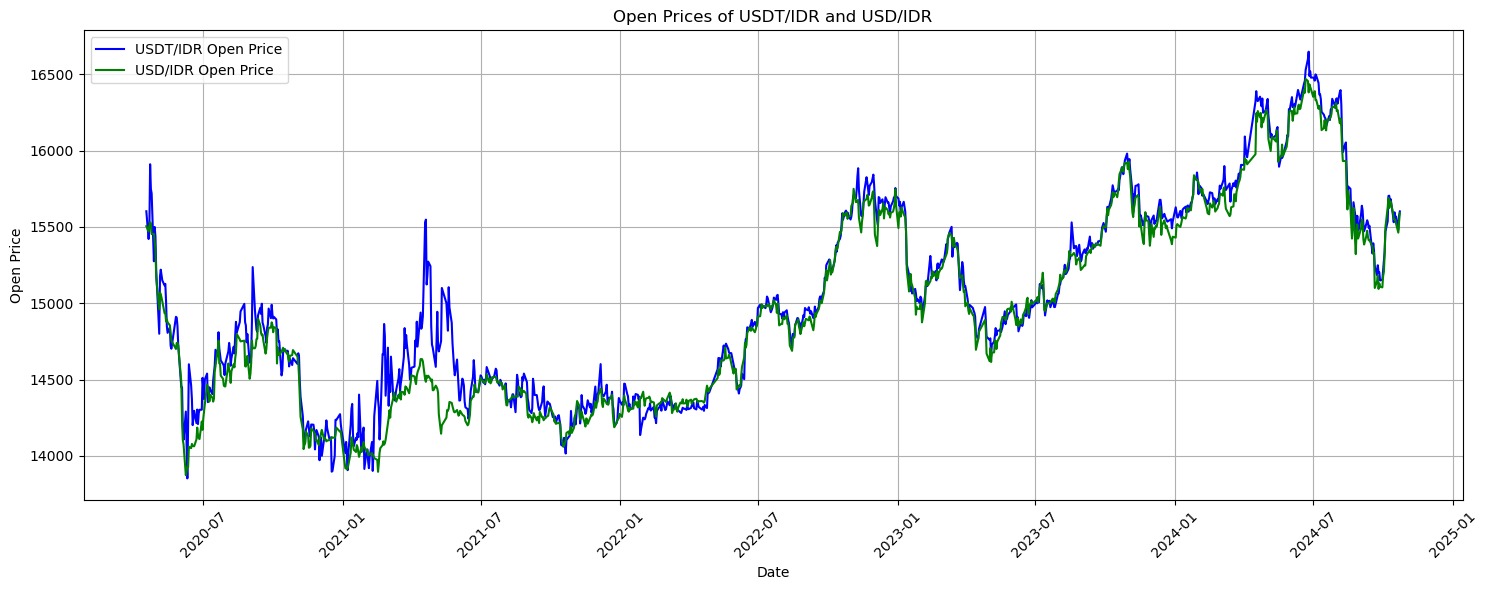

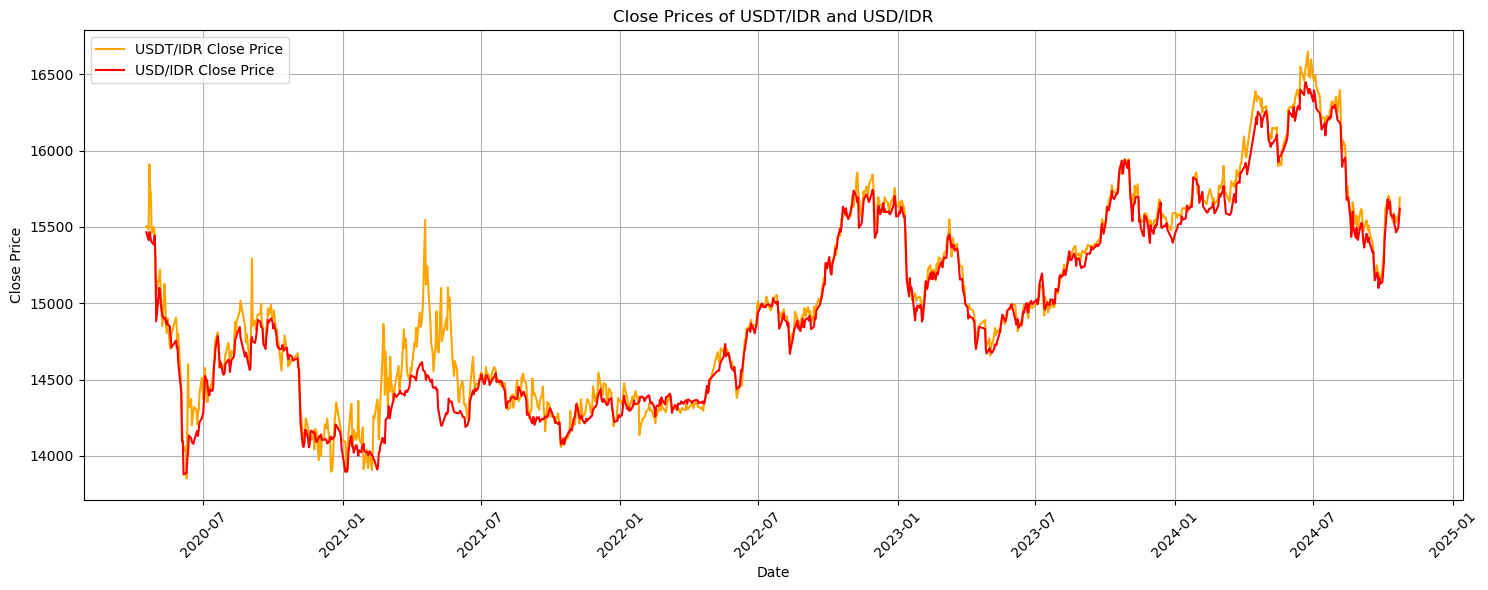

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Convert DataFrame columns to numpy arrays
opentime = np.array(joined_table['opentime'])
openprice = np.array(joined_table['openprice'])
date = np.array(joined_table['date'])
open_usd = np.array(joined_table['open'])

closeprice = np.array(joined_table['closeprice'])
close_usd = np.array(joined_table['close'])

# Set up the first figure for Open Prices
plt.figure(figsize=(15, 6))
plt.plot(opentime, openprice, label='USDT/IDR Open Price', color='blue')
plt.plot(date, open_usd, label='USD/IDR Open Price', color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Prices of USDT/IDR and USD/IDR')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Set up the second figure for Close Prices
plt.figure(figsize=(15, 6))
plt.plot(opentime, closeprice, label='USDT/IDR Close Price', color='orange')
plt.plot(date, close_usd, label='USD/IDR Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of USDT/IDR and USD/IDR')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Feature Engineer USDT/IDRT

In [17]:
# Binance USDT/IDRT
usdt_idrt = pd.read_csv('usdt_idrt_raw.csv')

usdt_idrt

,opentime,openprice,highprice,lowprice,closeprice,closetime
0,2020-04-17,15603.0,15603.0,3500.0,3800.0,2020-04-17
1,2020-04-17,3900.0,9999.0,3121.0,9999.0,2020-04-17
2,2020-04-17,9999.0,15400.0,3121.0,15300.0,2020-04-17
3,2020-04-17,15300.0,15399.0,3905.0,13662.0,2020-04-17
4,2020-04-17,13662.0,15000.0,3905.0,15000.0,2020-04-17
...,...,...,...,...,...,...
2375391,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375392,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375393,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375394,2024-10-23,15693.0,15693.0,15693.0,15693.0,2024-10-23
